In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import matplotlib.colors as mcolors



#### Open Data

In [3]:
selected_region_bg = gpd.read_file("../../data/shapes/SELECTED_DMV_BG") # selected dmv block groups

In [4]:
all_counties_gdf = gpd.read_file("../../data/shapes/tl_2020_us_county") # all us counties

dmv_counties_gdf = all_counties_gdf[all_counties_gdf["STATEFP"].isin(["11","24","51"])] # filter to dmv

In [5]:
# filter counties to selected

county_names = ["District of Columbia", "Arlington", "Falls Church", "Alexandria", "Fairfax",
                 "Prince George's", "Montgomery"]

dmv_counties_subset_gdf = dmv_counties_gdf[dmv_counties_gdf["NAME"].isin(county_names)]
dmv_counties_subset_gdf = dmv_counties_subset_gdf.drop(28, axis=0) # drop extra Montgomery county in VA

In [6]:
working_block_groups = pd.read_csv("../../data/working data/Filing_Dataset.csv") # the block groups with filing data that are in the model

#### Plot County Boundries

/var/folders/5c/d2k1t24s5zl213152tpfh6nh0000gn/T/ipykernel_49912/3625617018.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set3', 12)  # 12 is full range of Set3


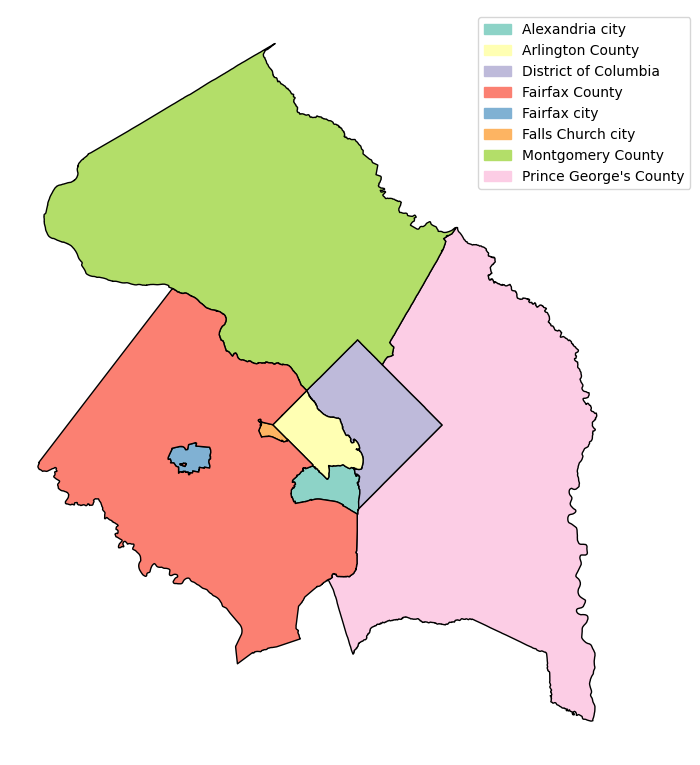

In [7]:
# Get unique counties
unique_counties = dmv_counties_subset_gdf['NAMELSAD'].unique()
unique_counties.sort()  # Optional: sort alphabetically

# Generate colormap and remove grey
cmap = plt.cm.get_cmap('Set3', 12)  # 12 is full range of Set3
color_list = [mcolors.rgb2hex(cmap(i)) for i in range(12)]
filtered_colors = [c for c in color_list if c.lower() != '#cccccc']  # remove light grey

# Make sure we have enough colors
if len(unique_counties) > len(filtered_colors):
    raise ValueError("Not enough colors after removing grey. Consider a different colormap or define custom colors.")

# Map counties to colors
county_color_map = dict(zip(unique_counties, filtered_colors[:len(unique_counties)]))

# Add color column
dmv_counties_subset_gdf['color'] = dmv_counties_subset_gdf['NAMELSAD'].map(county_color_map)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
dmv_counties_subset_gdf.plot(color=dmv_counties_subset_gdf['color'], edgecolor='black', ax=ax)

# Custom legend
patches = [
    mpatches.Patch(color=county_color_map[name], label=name)
    for name in unique_counties
]

plt.legend(handles=patches, loc='lower left', bbox_to_anchor=(.75, .75))
plt.axis('off')
plt.tight_layout()

plt.savefig("../../output/figs/selected_counties_only.png", dpi=300, bbox_inches='tight')

plt.show()

#### County Boundries with block groups

/var/folders/5c/d2k1t24s5zl213152tpfh6nh0000gn/T/ipykernel_49912/4124528377.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set3', 12)  # 12 is full range of Set3


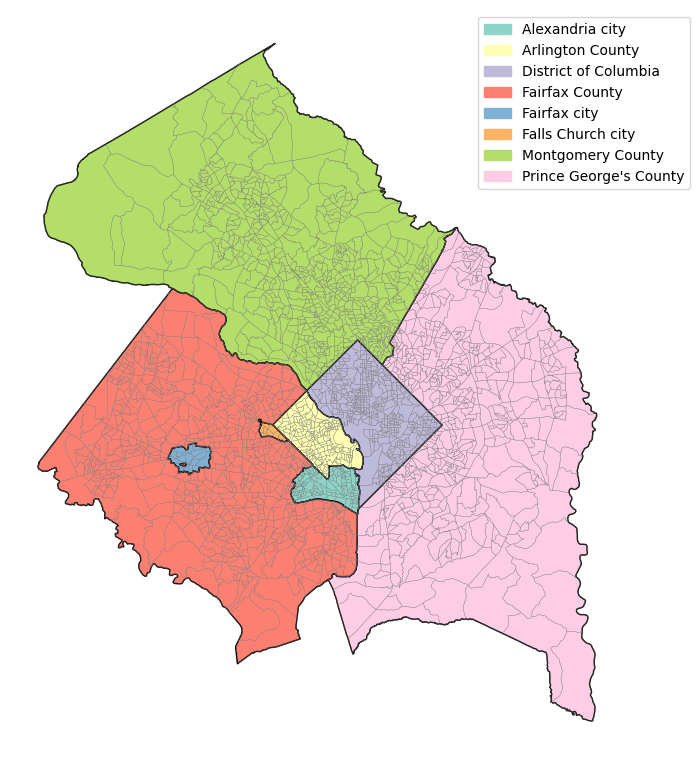

In [8]:
# Get unique counties
unique_counties = dmv_counties_subset_gdf['NAMELSAD'].unique()
unique_counties.sort()  # Optional: sort alphabetically

# Generate colormap and remove grey
cmap = plt.cm.get_cmap('Set3', 12)  # 12 is full range of Set3
color_list = [mcolors.rgb2hex(cmap(i)) for i in range(12)]
filtered_colors = [c for c in color_list if c.lower() != '#cccccc']  # remove light grey

# Map counties to colors
county_color_map = dict(zip(unique_counties, filtered_colors[:len(unique_counties)]))

# Add color column
dmv_counties_subset_gdf['color'] = dmv_counties_subset_gdf['NAMELSAD'].map(county_color_map)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
dmv_counties_subset_gdf.plot(color=dmv_counties_subset_gdf['color'], edgecolor='black', ax=ax)

selected_region_bg.plot(
    edgecolor='grey',  # Color of the block group outlines
    facecolor='none',  # Make them transparent inside
    linewidth=.2,     # Adjust line thickness if needed
    ax=ax
)

# Custom legend
patches = [
    mpatches.Patch(color=county_color_map[name], label=name)
    for name in unique_counties
]

plt.legend(handles=patches, loc='lower left', bbox_to_anchor=(.75, .75))
plt.axis('off')
plt.tight_layout()

#plt.savefig("../../output/figs/selected_counties_with_bg.png", dpi=300, bbox_inches='tight')

plt.show()

/var/folders/5c/d2k1t24s5zl213152tpfh6nh0000gn/T/ipykernel_49912/1016067597.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Set3', 12)  # 12 is full range of Set3


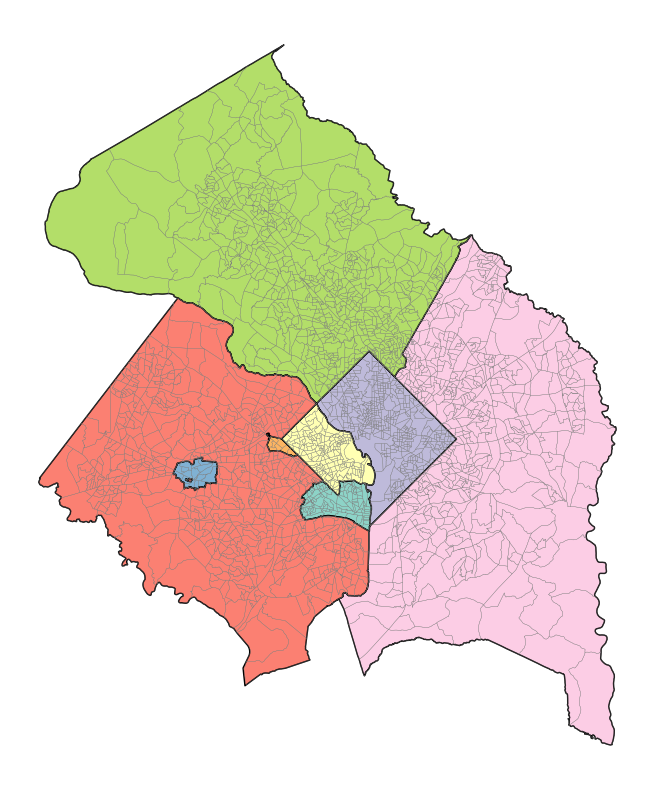

In [9]:
## without a legend

# Get unique counties
unique_counties = dmv_counties_subset_gdf['NAMELSAD'].unique()
unique_counties.sort()  # Optional: sort alphabetically

# Generate colormap and remove grey
cmap = plt.cm.get_cmap('Set3', 12)  # 12 is full range of Set3
color_list = [mcolors.rgb2hex(cmap(i)) for i in range(12)]
filtered_colors = [c for c in color_list if c.lower() != '#cccccc']  # remove light grey

# Map counties to colors
county_color_map = dict(zip(unique_counties, filtered_colors[:len(unique_counties)]))

# Add color column
dmv_counties_subset_gdf['color'] = dmv_counties_subset_gdf['NAMELSAD'].map(county_color_map)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
dmv_counties_subset_gdf.plot(color=dmv_counties_subset_gdf['color'], edgecolor='black', ax=ax)

selected_region_bg.plot(
    edgecolor='grey',  # Color of the block group outlines
    facecolor='none',  # Make them transparent inside
    linewidth=.2,     # Adjust line thickness if needed
    ax=ax
)

# Custom legend
patches = [
    mpatches.Patch(color=county_color_map[name], label=name)
    for name in unique_counties
]

#plt.legend(handles=patches, loc='lower left', bbox_to_anchor=(.75, .75))
plt.axis('off')
plt.tight_layout()

plt.savefig("../../output/figs/selected_counties_with_bg_no_legend.png", dpi=300, bbox_inches='tight')

plt.show()

#### Identify only used block groups

In [10]:
## add the same colors as above to only working block groups

# get geo data for selected bgs
working_block_groups_gdf = selected_region_bg[selected_region_bg["GEOID10"].astype("int").isin(working_block_groups["GEOID"])]
# grab the county names for each bg
working_block_groups_gdf_with_county = working_block_groups_gdf.merge(dmv_counties_subset_gdf[["COUNTYFP","NAMELSAD"]], left_on="COUNTYFP10", right_on="COUNTYFP", how="left")
# use the color map based on county names
working_block_groups_gdf_with_county['color'] = working_block_groups_gdf_with_county['NAMELSAD_y'].map(county_color_map)


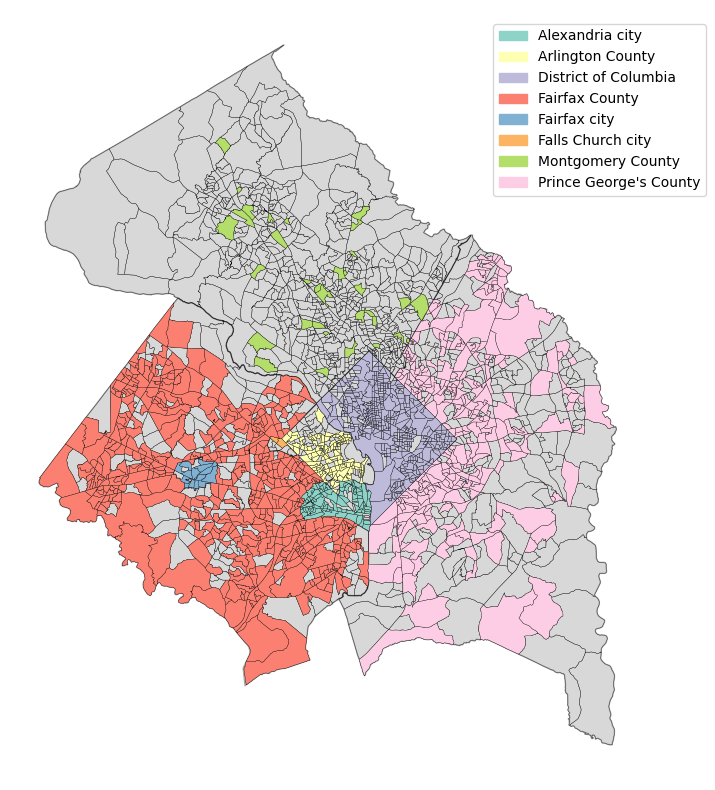

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
dmv_counties_subset_gdf.plot(color="grey", edgecolor='black', alpha=.3, ax=ax)

selected_region_bg.plot(
    edgecolor='black',  # Color of the block group outlines
    facecolor='none',  # Make them transparent inside
    linewidth=.2,     # Adjust line thickness if needed
    ax=ax
)

working_block_groups_gdf_with_county.plot(
    edgecolor='black',
    color=working_block_groups_gdf_with_county['color'],
    linewidth=.2,
    ax=ax)

# Create legend patches
patches = [
    mpatches.Patch(color=county_color_map[name], label=name)
    for name in unique_counties
]

plt.legend(handles=patches, loc='lower left', bbox_to_anchor=(.75,.75))
plt.axis('off')
plt.tight_layout()

plt.axis('off')
plt.tight_layout()

#plt.savefig("../../output/figs/", dpi=300, bbox_inches='tight')

plt.show()

### Add the percent of used block groups to the legend

In [12]:
county_pct_df = pd.DataFrame(round(working_block_groups_gdf["COUNTYFP10"].value_counts() / selected_region_bg["COUNTYFP10"].value_counts() * 100 ,2)).reset_index()

county_pct_df_with_names = county_pct_df.merge(dmv_counties_subset_gdf[["COUNTYFP","NAMELSAD"]], left_on="COUNTYFP10",right_on="COUNTYFP")

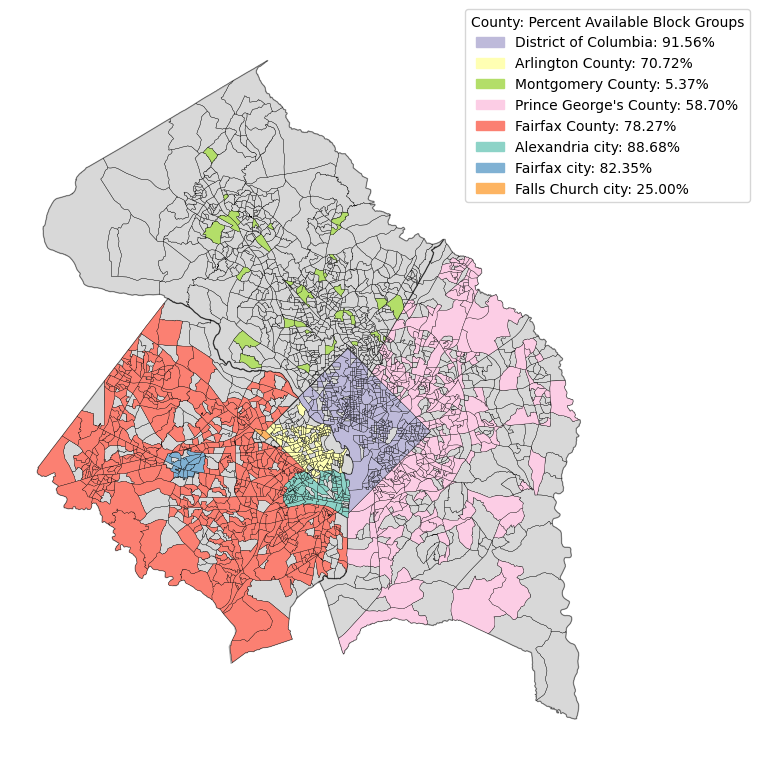

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
dmv_counties_subset_gdf.plot(color="grey", edgecolor='black', alpha=.3, ax=ax)

selected_region_bg.plot(
    edgecolor='black',
    facecolor='none',
    linewidth=.2,
    ax=ax
)

working_block_groups_gdf_with_county.plot(
    edgecolor='black',
    color=working_block_groups_gdf_with_county['color'],
    linewidth=.2,
    ax=ax
)

# Create legend with percentage labels
patches = [
    mpatches.Patch(
        color=county_color_map[row['NAMELSAD']],
        label=f"{row['NAMELSAD']}: {row['count']:.2f}%"
    )
    for _, row in county_pct_df_with_names.iterrows()
]

plt.legend(handles=patches, loc='lower left', bbox_to_anchor=(0.75, 0.75),title="County: Percent Available Block Groups")
plt.axis('off')
plt.tight_layout()

#plt.savefig("../../output/figs/usable_block_groups.png", dpi=300, bbox_inches='tight')

plt.show()

### Map Logistic Regression Outcomes

In [49]:
lr_predicted_vals = pd.read_csv("../../output/data/lr_predicted_vals.csv")

In [50]:
working_block_groups_gdf_with_county["predicted_lr"] = lr_predicted_vals

In [51]:
working_block_groups_gdf_with_county['plot_color'] = working_block_groups_gdf_with_county['predicted_lr'].map({
    0: '#7fb1d3',   # Color for predicted = 0
    1: '#fb8072'          # Color for predicted = 1
})

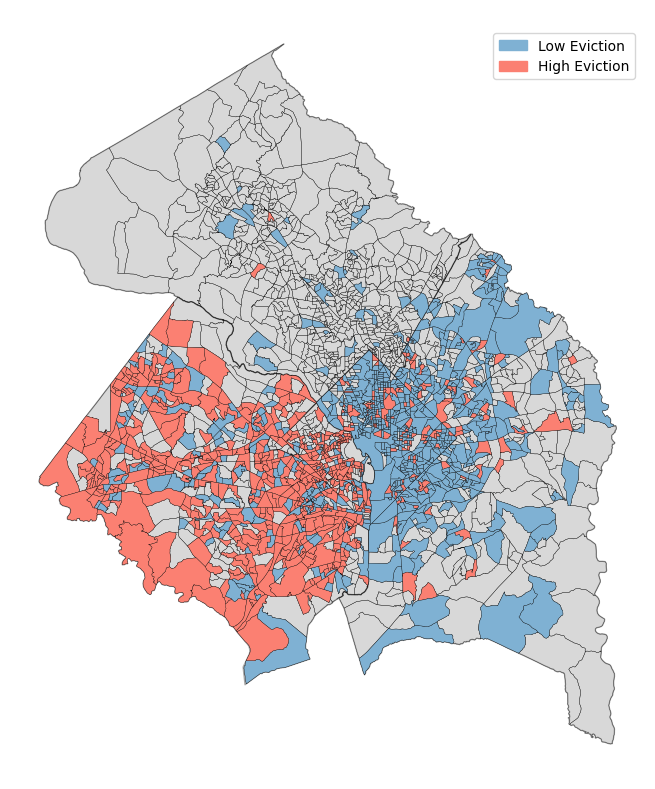

In [53]:
fig, ax = plt.subplots(figsize=(10, 8))
dmv_counties_subset_gdf.plot(color="grey", edgecolor='black', alpha=.3, ax=ax)

selected_region_bg.plot(
    edgecolor='black',
    facecolor='none',
    linewidth=.2,
    ax=ax
)

working_block_groups_gdf_with_county.plot(
    edgecolor='black',
    color=working_block_groups_gdf_with_county['plot_color'],
    linewidth=.2,
    ax=ax
)

patches = [
    mpatches.Patch(color='#7fb1d3', label='Low Eviction'),   # Color for predicted = 0
    mpatches.Patch(color='#fb8072', label='High Eviction')   # Color for predicted = 1
]

plt.legend(handles=patches, loc='lower left', bbox_to_anchor=(0.75, .9))
plt.tight_layout()

plt.axis('off')
plt.tight_layout()

plt.savefig("../../output/figs/lr_predicted_map.png", dpi=300, bbox_inches='tight')

plt.show()

### Map RFC Outcomes

In [62]:
rfc_predicted_vals = pd.read_csv("../../output/data/rfc_predicted_vals.csv")

In [63]:
working_block_groups_gdf_with_county["predicted_rfc"] = rfc_predicted_vals

In [64]:
working_block_groups_gdf_with_county['plot_color'] = working_block_groups_gdf_with_county['predicted_rfc'].map({
    0: '#7fb1d3',   # Color for predicted = 0
    1: '#fb8072'          # Color for predicted = 1
})

In [68]:
dc = working_block_groups_gdf_with_county[working_block_groups_gdf_with_county["STATEFP10"] == "11"]

In [73]:
dc_2 = dmv_counties_subset_gdf[dmv_counties_subset_gdf["STATEFP"] == "11"]

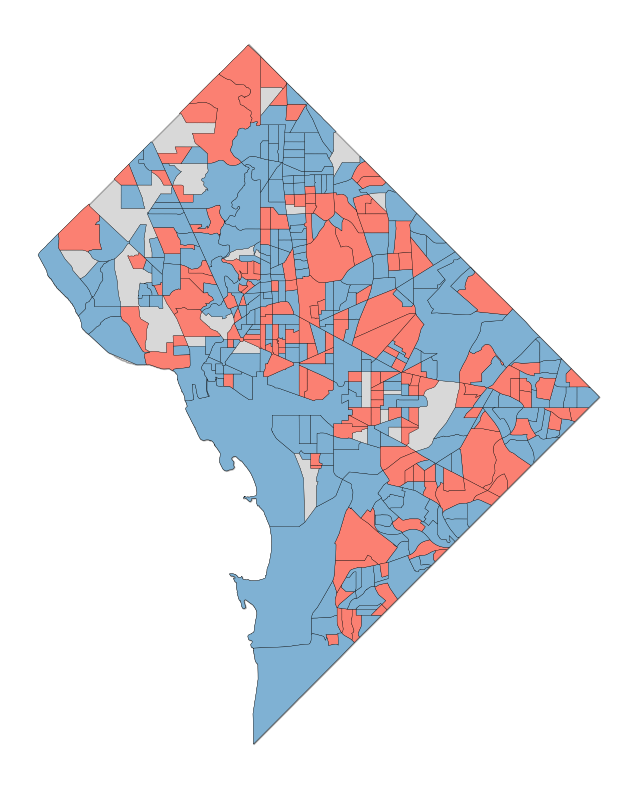

In [76]:
fig, ax = plt.subplots(figsize=(10, 8))
dc_2.plot(color="grey", edgecolor='black', alpha=.3, ax=ax)

dc.plot(
    edgecolor='black',
    facecolor='none',
    linewidth=.2,
    ax=ax
)

dc.plot(
    edgecolor='black',
    color=dc['plot_color'],
    linewidth=.2,
    ax=ax
)

patches = [
    mpatches.Patch(color='#7fb1d3', label='Low Eviction'),   # Color for predicted = 0
    mpatches.Patch(color='#fb8072', label='High Eviction')   # Color for predicted = 1
]

#plt.legend(handles=patches, loc='lower left', bbox_to_anchor=(0.75, .9))
plt.tight_layout()

plt.axis('off')
plt.tight_layout()

#plt.savefig("../../output/figs/rfc_predicted_map.png", dpi=300, bbox_inches='tight')

plt.show()

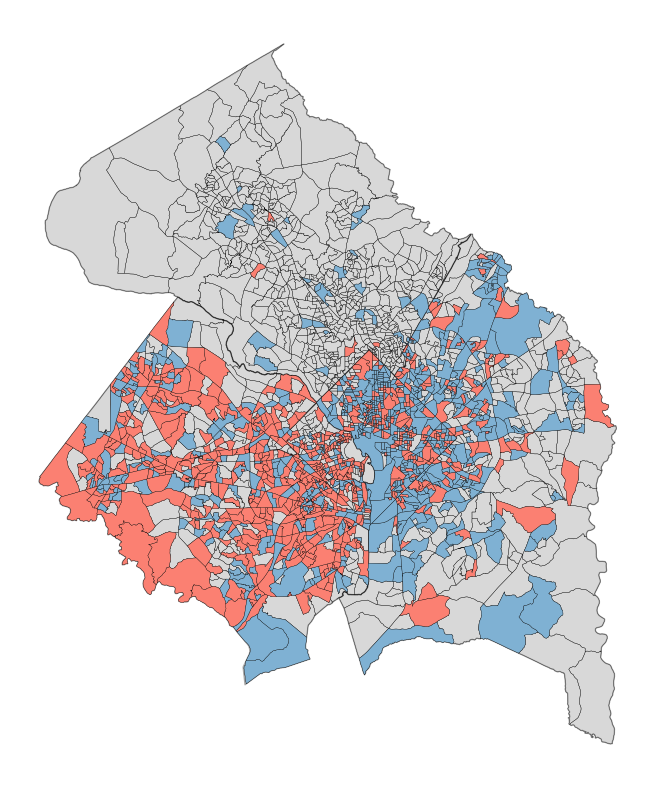

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))
dmv_counties_subset_gdf.plot(color="grey", edgecolor='black', alpha=.3, ax=ax)

selected_region_bg.plot(
    edgecolor='black',
    facecolor='none',
    linewidth=.2,
    ax=ax
)

working_block_groups_gdf_with_county.plot(
    edgecolor='black',
    color=working_block_groups_gdf_with_county['plot_color'],
    linewidth=.2,
    ax=ax
)

patches = [
    mpatches.Patch(color='#7fb1d3', label='Low Eviction'),   # Color for predicted = 0
    mpatches.Patch(color='#fb8072', label='High Eviction')   # Color for predicted = 1
]

#plt.legend(handles=patches, loc='lower left', bbox_to_anchor=(0.75, .9))
plt.tight_layout()

plt.axis('off')
plt.tight_layout()

plt.savefig("../../output/figs/rfc_predicted_map.png", dpi=300, bbox_inches='tight')

plt.show()

### Map SVC Outcomes

In [58]:
svc_predicted_vals = pd.read_csv("../../output/data/svc_predicted_vals.csv")

In [59]:
working_block_groups_gdf_with_county["predicted_svc"] = svc_predicted_vals

In [60]:
working_block_groups_gdf_with_county['plot_color'] = working_block_groups_gdf_with_county['predicted_svc'].map({
    0: '#7fb1d3',   # Color for predicted = 0
    1: '#fb8072'          # Color for predicted = 1
})

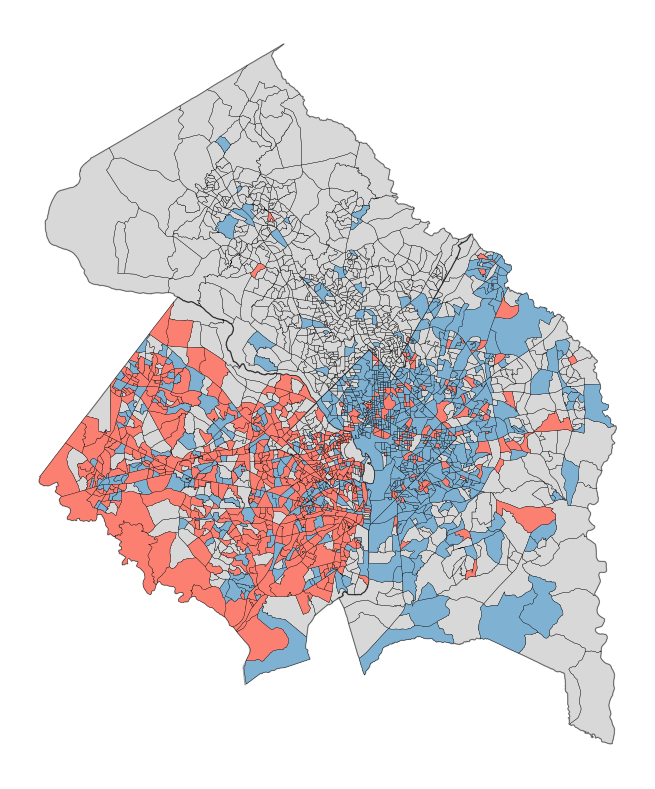

In [61]:
fig, ax = plt.subplots(figsize=(10, 8))
dmv_counties_subset_gdf.plot(color="grey", edgecolor='black', alpha=.3, ax=ax)

selected_region_bg.plot(
    edgecolor='black',
    facecolor='none',
    linewidth=.2,
    ax=ax
)

working_block_groups_gdf_with_county.plot(
    edgecolor='black',
    color=working_block_groups_gdf_with_county['plot_color'],
    linewidth=.2,
    ax=ax
)

patches = [
    mpatches.Patch(color='#7fb1d3', label='Low Eviction'),   # Color for predicted = 0
    mpatches.Patch(color='#fb8072', label='High Eviction')   # Color for predicted = 1
]

#plt.legend(handles=patches, loc='lower left', bbox_to_anchor=(0.75, .9))
plt.tight_layout()

plt.axis('off')
plt.tight_layout()

plt.savefig("../../output/figs/svc_predicted_map.png", dpi=300, bbox_inches='tight')

plt.show()

In [82]:
working_block_groups_gdf_with_county["predicted_lr"].sum()


np.int64(684)

In [84]:
684/1498

0.45660881174899864

In [85]:
working_block_groups_gdf_with_county["predicted_rfc"].sum()

np.int64(751)

In [88]:
751/1498

0.5013351134846462

In [86]:
working_block_groups_gdf_with_county["predicted_svc"].sum()

np.int64(664)

In [87]:
664/1498

0.4432576769025367